In [24]:
#testing out the nba_api
from nba_api.stats.endpoints import playercareerstats
# Anthony Davis
career = playercareerstats.PlayerCareerStats(player_id='203076')
career.get_data_frames()[0].columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [25]:
# Dependencies
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#file path for each csv files
adv_path = "Research Data/NBAadvanced.csv"
per_path = "Research Data/NBAper36.csv"
sal_path = "Research Data/NBAsalaries.csv"
birth_path = "Research Data/birth_dataframe.csv"
income_path = "Research Data/State_median_income.csv"

#turning all of the csv file into data
adv_data = pd.read_csv(adv_path, encoding='utf8')
per_data = pd.read_csv(per_path, encoding='utf8')
sal_data = pd.read_csv(sal_path, encoding='utf8')
birth_data = pd.read_csv(birth_path, encoding='utf8')
income_data = pd.read_csv(income_path, encoding='utf8')

#adjustment for birht_data
birth_data = birth_data[["Player","City", "State"]]

#adjustment for median household income
income_data= income_data[['Name', 'Poverty Percent, All Ages', 'Median Household Income']]
income_data= income_data.rename(columns=({'Name': 'State'}))

#filling all of the null values with 
adv_data.fillna(0, inplace = True)
per_data.fillna(0, inplace = True) 
sal_data.fillna(0, inplace = True) 

In [26]:
#merge some data
adv_birth = pd.merge(adv_data,birth_data, on = "Player")
per_birth = pd.merge(per_data,birth_data, on = "Player")
per_birth_sal = pd.merge(per_birth,sal_data, on = "Player")
adv_birth_sal = pd.merge(adv_birth,sal_data, on = "Player")


In [27]:
#saving the combined data to a csv
per_birth_sal.to_csv("per_birth_sal.csv", index= False)

adv_birth_sal.to_csv("adv_birth_sal.csv", index=False)

In [28]:
#adding a columns where salary are shown in millions so we can easily read the data
per_birth_sal['millions'] = per_birth_sal['2019-20']/1000000
#creating the datframe from the 
state_sal = per_birth_sal.groupby('State')['millions'].median().reset_index()
play_sal = per_birth_sal.groupby('State')['Player'].count().reset_index()

combined_df = pd.merge(state_sal,play_sal, on = "State")

combined_df = combined_df.sort_values('millions',ascending = False)

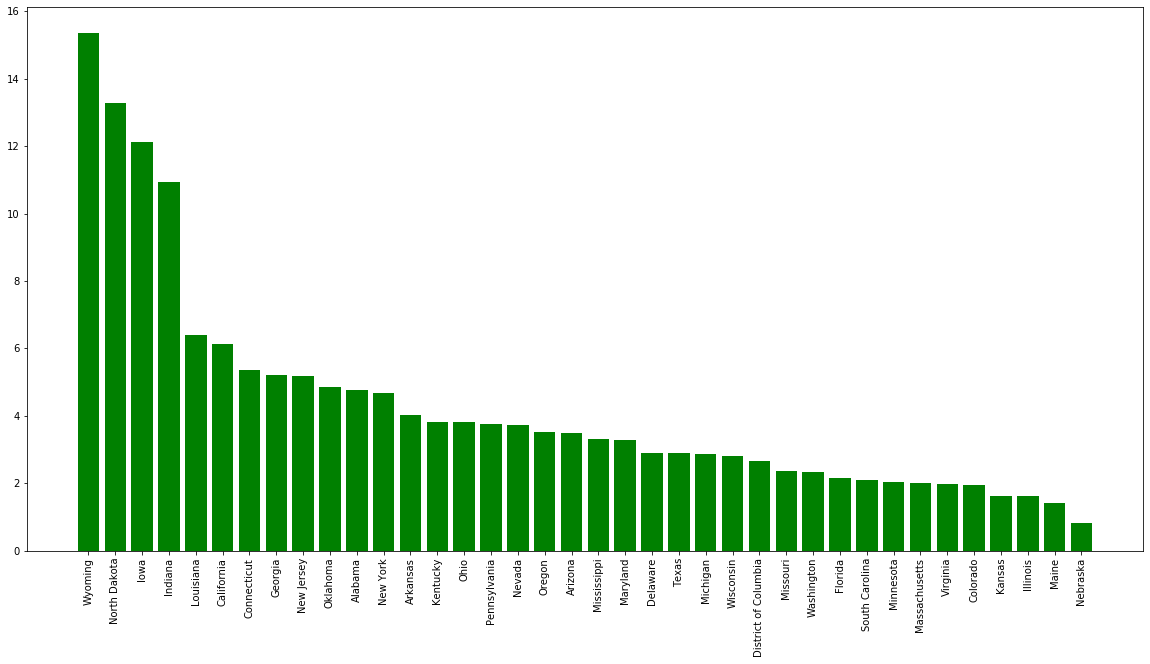

In [29]:
x_values = combined_df['State']
y_values = combined_df['millions']

plt.figure(figsize = (20,10))
plt.bar(x_values, y_values,color = 'g',align = 'center')
plt.xticks(rotation='vertical')
#plt.tight_layout()
plt.show()

In [38]:
#merge median house hold income and PER
adv_income = pd.merge(adv_birth_sal,income_data, on = "State")
adv_income = adv_income[['Player', 'Median Household Income',"State", 'PER','2019-20', 'Poverty Percent, All Ages']]
adv_income = adv_income.rename(columns=({'2019-20': 'Salary'}))


PER_income = PER_income.loc[PER_income["# of Players"] > 5]
x_data= adv_income['Poverty Percent, All Ages']
y_data= adv_income['Average Salary']

# x_data= PER_income.iloc[0:14,0]
# y_data= PER_income.iloc[0:14,1]
correlation = st.pearsonr(x_data,y_data)

plt.scatter(x_data,y_data)

plt.title('State Poverty % Effect on Median Player Salary')
plt.xlabel('Median Household Income')
plt.ylabel('Average PER')

print(f"The correlation between both factors is {round(correlation[0],2)}")


plt.show()

,Player,Median Household Income,State,PER,Salary,"Poverty Percent, All Ages"
0,Bam Adebayo,81777.0,New Jersey,20.6,3454080,9.5
1,Kyle Anderson,81777.0,New Jersey,13.0,9073050,9.5
2,Jalen Brunson,81777.0,New Jersey,15.0,1416582,9.5
3,Jaren Jackson Jr.,81777.0,New Jersey,16.1,6927480,9.5
4,Naz Reid,81777.0,New Jersey,15.3,898310,9.5
...,...,...,...,...,...,...
317,Rajon Rondo,50189.0,Kentucky,12.4,2564753,16.7
318,D'Angelo Russell,50189.0,Kentucky,18.7,27285000,16.7
319,P.J. Washington,50189.0,Kentucky,12.4,3831840,16.7
320,Khyri Thomas,59724.0,Nebraska,3.2,838464,11.0


In [31]:
adv_income_group = adv_income.groupby('State')


PER_income = pd.DataFrame({
    "Median Household Income" : adv_income_group['Median Household Income'].mean(),
    "Average PER" : adv_income_group['PER'].mean(),
    "Average Salary" : adv_income_group['Salary'].mean(),
    "Average Salary in milllions" : adv_income_group['Salary'].mean()/1000000,
    "# of Players" : adv_income_group['Median Household Income'].count()
})

PER_income.sort_values('Median Household Income',ascending = False, inplace = True)

In [32]:
PER_income

,Median Household Income,Average PER,Average Salary,Average Salary in milllions,# of Players
State,,,,,
Maryland,83076.0,8.925000,6.266096e+06,6.266096,12
District of Columbia,82533.0,9.300000,2.929278e+06,2.929278,4
New Jersey,81777.0,17.750000,8.169917e+06,8.169917,6
Massachusetts,79817.0,13.488889,2.069511e+06,2.069511,9
Connecticut,76366.0,12.100000,5.348007e+06,5.348007,1
California,75250.0,14.247500,1.132885e+07,11.328848,40
Washington,74023.0,12.636364,5.437835e+06,5.437835,11
Virginia,72600.0,9.837500,3.079814e+06,3.079814,8
Colorado,71949.0,15.900000,1.948080e+06,1.948080,1


The correlation between both factors is -0.3


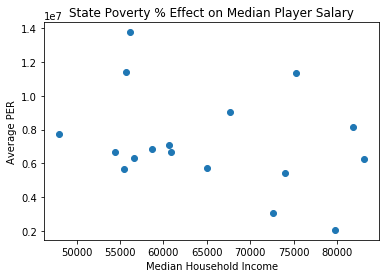

In [35]:
# Scatter plot
PER_income = PER_income.loc[PER_income["# of Players"] > 5]
x_data= PER_income['Median Household Income']
y_data= PER_income['Average Salary']

# x_data= PER_income.iloc[0:14,0]
# y_data= PER_income.iloc[0:14,1]
correlation = st.pearsonr(x_data,y_data)

plt.scatter(x_data,y_data)

plt.title('State Poverty % Effect on Median Player Salary')
plt.xlabel('Median Household Income')
plt.ylabel('Average PER')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('images/Sab/salary_PER.pdf')
plt.show()

In [34]:
PER_income = PER_income.loc[PER_income["# of Players"] > 5]
x_data= adv_birth_sal['Median Household Income']
y_data= adv_birth_sal['Average Salary']

# x_data= PER_income.iloc[0:14,0]
# y_data= PER_income.iloc[0:14,1]
correlation = st.pearsonr(x_data,y_data)

plt.scatter(x_data,y_data)

plt.title('PER vs 2019-2020 NBA Salary')
plt.xlabel('PER')
plt.ylabel('2019-2020 Salary')

print(f"The correlation between both factors is {round(correlation[0],2)}")

plt.savefig('images/Sab/salary_PER.pdf')
plt.show()

KeyError: 'Median Household Income'

In [37]:
income_data

,State,"Poverty Percent, All Ages",Median Household Income
0,United States,13.1,61937.0
1,Alabama,16.8,49881.0
2,Alaska,11.1,74912.0
3,Arizona,14.1,59079.0
4,Arkansas,16.8,47094.0
5,California,12.8,75250.0
6,Colorado,9.7,71949.0
7,Connecticut,10.3,76366.0
8,Delaware,12.2,65467.0
9,District of Columbia,16.1,82533.0
